# Stock Analysis During COVID-19
range from 2019.12 to 2020.12

- by Chenyang Wang

In [2]:
import numpy as np

import pandas as pd

import matplotlib.pyplot as plt


%matplotlib inline

# Step 1: Read data 
company: Alibaba (BABA)

In [3]:
import pandas_datareader
import pandas_datareader.data as web
import datetime

In [4]:
start = datetime.datetime(2019,12,1)
end = datetime.datetime(2020,12,1)
pd.set_option('display.precision',3)
symbol = 'BABA'
xlk = web.DataReader(symbol,'yahoo',start,end)

First check the data

In [ ]:
xlk.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2019-12-02,198.67,193.51,198.58,196.31,19357700,196.31
2019-12-03,195.00,189.85,190.97,194.90,18355300,194.90
2019-12-04,196.66,193.23,195.53,193.74,14849300,193.74
2019-12-05,200.94,196.43,196.93,200.00,22290200,200.00
2019-12-06,202.00,199.51,201.11,201.89,14087300,201.89


In [ ]:
xlk.tail()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2020-11-24,280.61,272.800,276.235,279.96,20660500,279.96
2020-11-25,279.33,274.050,275.700,277.72,15229300,277.72
2020-11-27,278.92,275.666,278.800,276.48,9583200,276.48
2020-11-30,268.97,262.520,268.970,263.36,30476100,263.36
2020-12-01,265.67,261.570,265.470,264.01,14606300,264.01


In [ ]:
xlk.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 253 entries, 2019-12-02 to 2020-12-01
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   High       253 non-null    float64
 1   Low        253 non-null    float64
 2   Open       253 non-null    float64
 3   Close      253 non-null    float64
 4   Volume     253 non-null    int64  
 5   Adj Close  253 non-null    float64
dtypes: float64(5), int64(1)
memory usage: 13.8 KB


In [ ]:
xlk.describe()

,High,Low,Open,Close,Volume,Adj Close
count,253.000,253.000,253.000,253.000,2.530e+02,253.000
mean,238.721,232.573,235.857,235.904,1.736e+07,235.904
std,36.863,35.892,36.567,36.481,8.127e+06,36.481
min,178.500,169.950,175.270,176.340,5.523e+06,176.340
25%,208.920,203.756,206.700,206.700,1.217e+07,206.700
50%,223.560,219.780,221.500,220.900,1.587e+07,220.900
75%,268.970,261.755,265.470,265.650,2.003e+07,265.650
max,319.320,308.910,313.500,317.140,6.106e+07,317.140


# Step 2: Data Visulization

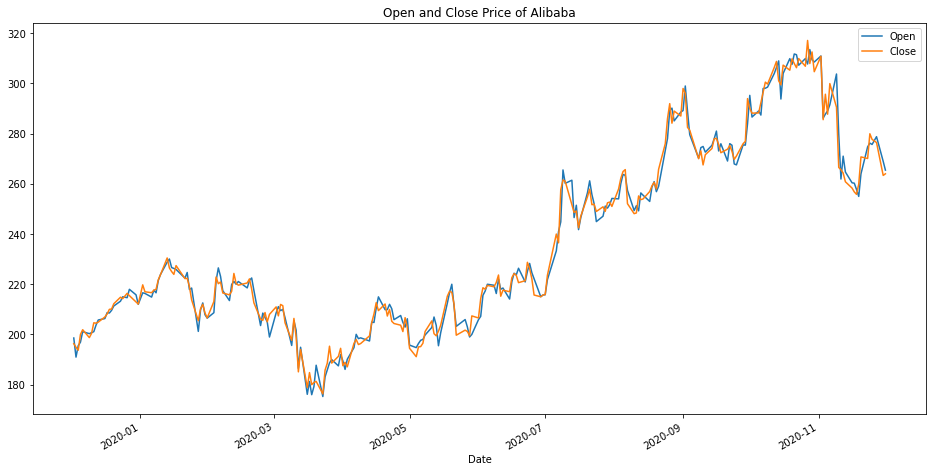

In [5]:
xlk.plot(y = ['Open','Close'],figsize = (16,8),title = 'Open and Close Price of Alibaba')

In [6]:
xlk[xlk['Open'] == xlk['Open'].min()]

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2020-03-23,178.5,169.95,175.27,176.34,22554700,176.34


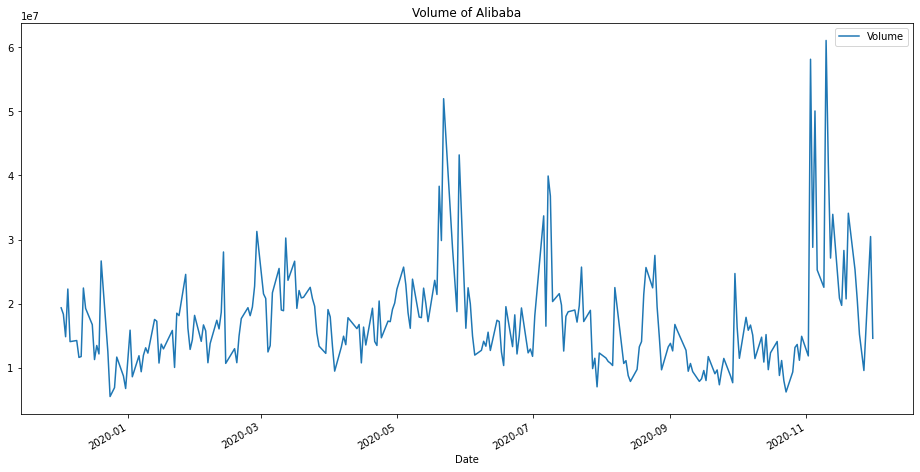

In [7]:
xlk.plot(y = ['Volume'],figsize = (16,8),title = 'Volume of Alibaba')

In [8]:
xlk[xlk['Volume'] == xlk['Volume'].max()]

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2020-11-10,280.0,264.33,279.97,266.54,61064000,266.54


Add 'relative' column

In [9]:
openPrice = xlk['Open'][0]
xlk['Relative'] = (xlk['Open']-openPrice)/openPrice

In [10]:
xlk.tail()

,High,Low,Open,Close,Volume,Adj Close,Relative
Date,,,,,,,
2020-11-24,280.61,272.800,276.235,279.96,20660500,279.96,0.391
2020-11-25,279.33,274.050,275.700,277.72,15229300,277.72,0.388
2020-11-27,278.92,275.666,278.800,276.48,9583200,276.48,0.404
2020-11-30,268.97,262.520,268.970,263.36,30476100,263.36,0.354
2020-12-01,265.67,261.570,265.470,264.01,14606300,264.01,0.337


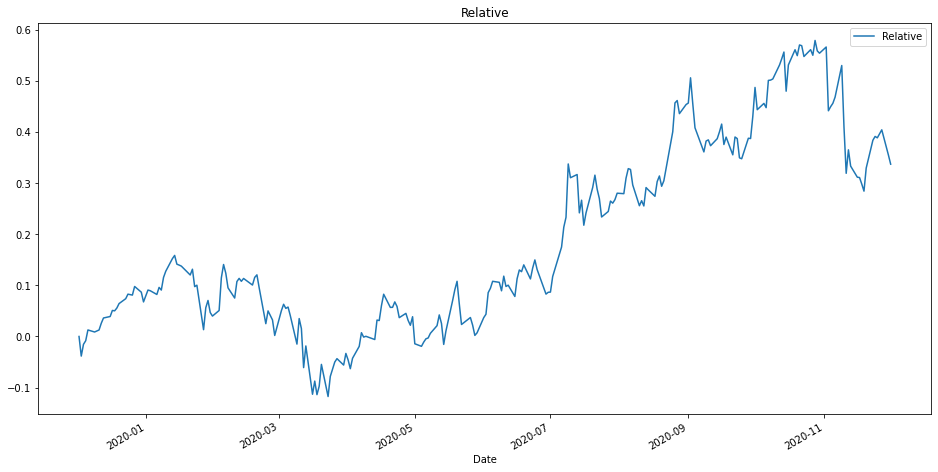

In [11]:
xlk.plot(y = ['Relative'],figsize = (16,8),title = 'Relative')

Compare Open Price With Some Moving Averages

In [12]:
xlk['MA5'] = xlk['Open'].rolling(5).mean()
xlk['MA15'] = xlk['Open'].rolling(15).mean()
xlk['MA50'] = xlk['Open'].rolling(50).mean()

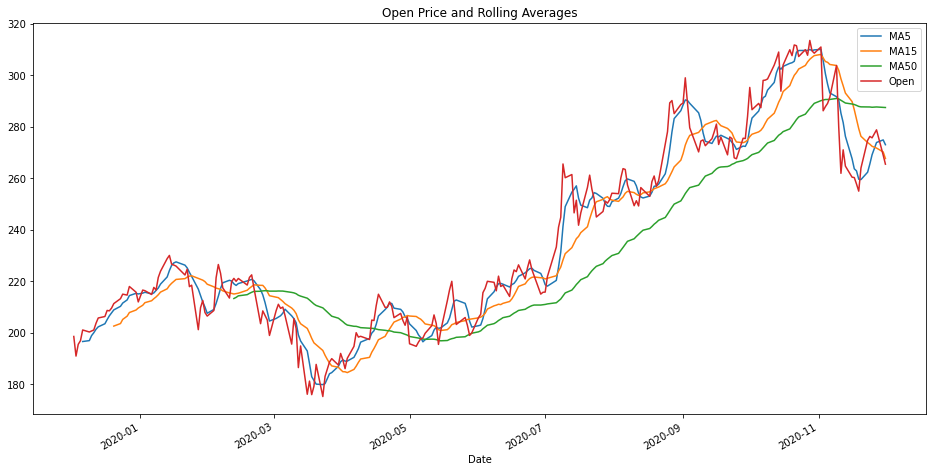

In [13]:
xlk.plot(y = ['MA5','MA15','MA50','Open'],figsize = (16,8),title = 'Open Price and Rolling Averages')

## Some Observations from this part

1. We can see that the stock price from 2020-01 to 2020-03 is relative low compare to now, perhaps this is becuase of the covid-19 pandemic, Economy in China as whole was not good.

2. We can see that the lowest open price is at 2020-03-23, which is in the middle of the lockdown period in China, which makes sense.

3. We can see that the volumn reaches its peak at 2020-11-10, which is the day before the start of the Tmall Double 11 Festival, which makes sense.


# Step 3: Some Financial Analysis

## 1. Daily Percentage Change

In [23]:
xlk['Returns'] = (xlk['Close']/xlk['Close'].shift(1))-1
xlk.head()

,High,Low,Open,Close,Volume,Adj Close,Relative,MA5,MA15,MA50,returns,Cumulative Return,Returns
Date,,,,,,,,,,,,,
2019-12-02,198.67,193.51,198.58,196.31,19357700,196.31,0.000,NaN,NaN,NaN,NaN,NaN,NaN
2019-12-03,195.00,189.85,190.97,194.90,18355300,194.90,-0.038,NaN,NaN,NaN,-0.007,0.993,-0.007
2019-12-04,196.66,193.23,195.53,193.74,14849300,193.74,-0.015,NaN,NaN,NaN,-0.006,0.987,-0.006
2019-12-05,200.94,196.43,196.93,200.00,22290200,200.00,-0.008,NaN,NaN,NaN,0.032,1.019,0.032
2019-12-06,202.00,199.51,201.11,201.89,14087300,201.89,0.013,196.624,NaN,NaN,0.009,1.028,0.009


plot histogram -> volatility 

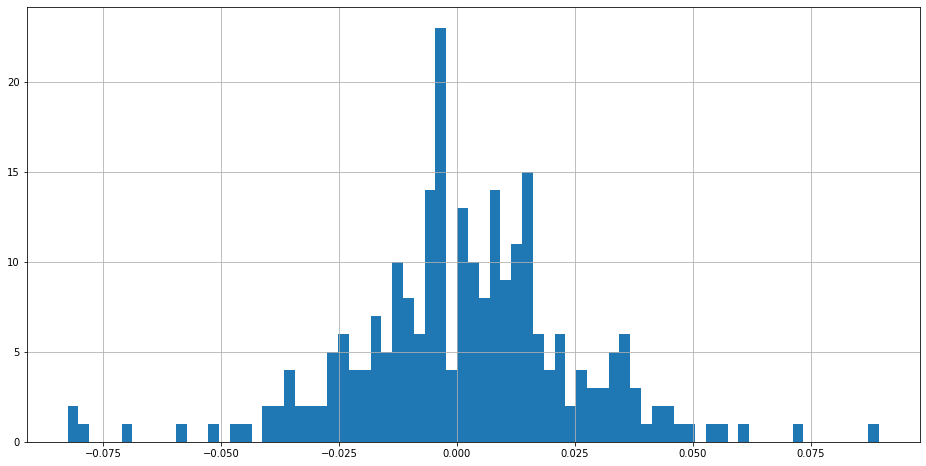

In [24]:
xlk['Returns'].hist(bins = 75,figsize = (16,8))

## 2. Sharpe ratio

In [25]:
babaSR = xlk['Returns'].mean()/xlk['returns'].std()
print(babaSR)

0.06081226007181532


Annulize the SR

In [26]:
babaASR = babaSR * (252*0.5)
print(babaASR)

7.66234476904873


## 3. Cumulative Daily Returns

In [27]:
xlk['Cumulative Return'] = (1+xlk['Returns']).cumprod()
xlk.head()

,High,Low,Open,Close,Volume,Adj Close,Relative,MA5,MA15,MA50,returns,Cumulative Return,Returns
Date,,,,,,,,,,,,,
2019-12-02,198.67,193.51,198.58,196.31,19357700,196.31,0.000,NaN,NaN,NaN,NaN,NaN,NaN
2019-12-03,195.00,189.85,190.97,194.90,18355300,194.90,-0.038,NaN,NaN,NaN,-0.007,0.993,-0.007
2019-12-04,196.66,193.23,195.53,193.74,14849300,193.74,-0.015,NaN,NaN,NaN,-0.006,0.987,-0.006
2019-12-05,200.94,196.43,196.93,200.00,22290200,200.00,-0.008,NaN,NaN,NaN,0.032,1.019,0.032
2019-12-06,202.00,199.51,201.11,201.89,14087300,201.89,0.013,196.624,NaN,NaN,0.009,1.028,0.009


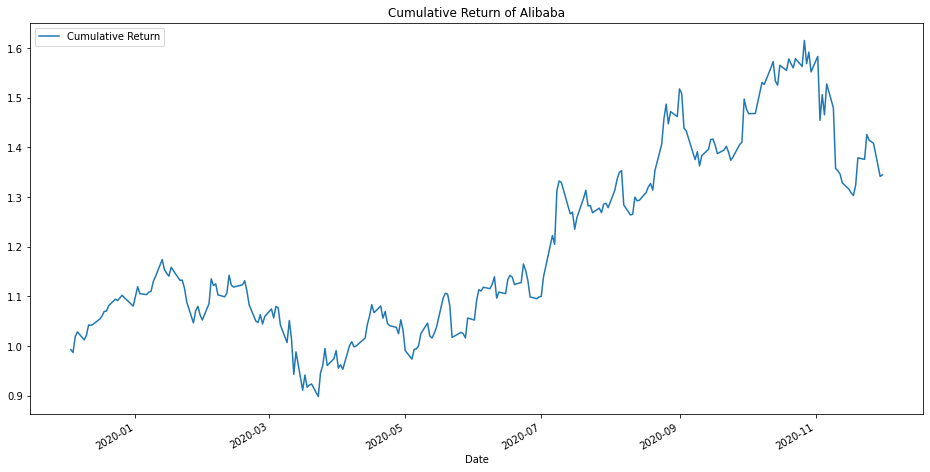

In [28]:
xlk.plot(y = ['Cumulative Return'],figsize = (16,8),title = 'Cumulative Return of Alibaba')